# This script inteprets the ttest results

In this script, we will interpret the results of the ttest from the previous step. It requires the path to the folder of t-test results which will be imported and displayed depending on which plot is required.

In [1]:
# Imports
import interpret_ttest_results as result_interpret
import pandas as pd
import openai_api_test as openai
import ast

['Q9UKT7', 'Q9UKU0', 'Q9UKR5', 'Q9H0A0', 'Q9UKS6', 'Q8WTS1', 'Q9ULI0', 'Q8WUA7', 'Q9UEC4', 'Q9Y3C4', 'Q9Y3F4', 'Q9H3S7', 'Q15058', 'Q8WVC6', 'Q9UK17', 'Q17RY0', 'Q9H3K6', 'Q9UKF3', 'Q9UPN4', 'P57771', 'P50876', 'Q9NQ87', 'Q9H3D4', 'Q9H2X0', 'O15062', 'Q17RB8', 'Q9UIM6', 'Q96IY4', 'Q8N8D1', 'Q9BYC5', 'Q96BR5', 'Q8N8U2', 'Q6GMV2', 'Q969R5', 'Q9BW83', 'Q9H409', 'Q8IXA5', 'Q9H3D5', 'Q9NPH2', 'Q8TE03', 'Q8WUJ3', 'Q9ULV8', 'Q9Y680', 'Q9BT78', 'Q6NXH9', 'Q96LQ9', 'Q8N429', 'Q9H0M0', 'Q9UFH2', 'Q9BSM1', 'Q9Y3F0', 'Q9Y236', 'Q6PXL6', 'Q9Y680']


In [2]:
path = 'G:/My Drive/Data/data/eIF4F pilot/imputed/ttest results/'

In [3]:
# scan folder for results
results_paths = result_interpret.scan_folder(path)
# label proteins of interest (eIFs)
#pois = ['EIF1', 'EIF2A', 'EIF2AK1', 'EIF2AK2', 'EIF2AK3', 'EIF2AK4', 'EIF2B1', 'EIF2B2', 'EIF2B3', 'EIF2B4', 'EIF2B5', 'EIF2C1', 'EIF2C2', 'EIF2C3', 'EIF2C4', 'EIF2S1', 'EIF2S2', 'EIF2S3', 'EIF3A', 'EIF3B', 'EIF3C', 'EIF3D', 'EIF3E', 'EIF3F', 'EIF3G', 'EIF3H', 'EIF3I', 'EIF3J', 'EIF3K', 'EIF3L', 'EIF3M', 'EIF4A1', 'EIF4A2', 'EIF4A3', 'EIF4B', 'EIF4E', 'EIF4E2', 'EIF4E3', 'EIF4EBP1', 'EIF4EBP2', 'EIF4EBP3', 'EIF4G1', 'EIF4G2', 'EIF4G3', 'EIF4H', 'EIF5', 'EIF5A', 'EIF5A2', 'EIF5B', 'EIF6']
# knock downs
#pois = ['EIF4E','EIF4G1','EIF4G2','EIF4G3']
# EEFs
#pois = ['EEF1A1', 'EEF1A2', 'EEF1B2', 'EEF1D', 'EEF1E1', 'EEF1G', 'EEF2', 'EEF2K']
# mtor
#pois = ['Q9Y4I3', 'Q00653', 'P42345', 'P27448', 'P42336', 'P42338', 'O15511', 'P23458', 'Q9NRR4', 'Q9H8S1', 'Q8WTQ7', 'Q9H3Y6', 'Q7Z434', 'Q9HD23', 'Q9HD24', 'O75676', 'P49137', 'Q9H6R7', 'Q8TB37', 'Q8N122', 'Q8NC51', 'P27348', 'Q5EBM0', 'P31749', 'P31751', 'Q9Y243', 'Q9HBH9', 'Q96B36', 'Q8WVC6', 'Q8TAI7', 'Q8TAM2', 'Q9H492', 'P38936', 'P31750', 'P42344', 'P11362', 'P0CY32', 'Q7Z434', 'Q9HD24', 'Q9Y243', 'Q9H492', 'Q9BZD4', 'Q9Y243', 'O15514', 'Q9H6R7', 'O15169', 'Q8TAM2']
# RNA binding
#pois = ['PABPC1', 'ELAVL1', 'IGF2BP1', 'IGF2BP2', 'IGF2BP3', 'FXR1', 'FXR2', 'AGO1', 'AGO2', 'AGO3', 'AGO4', 'AGO5', 'EIF4A1', 'EIF4A2', 'EIF4A3', 'TIAL1', 'TIA1', 'LIN28A', 'LIN28B', 'EIF5A']
# ribosomal
pois = ['P60866','P07738', 'P25398', 'P25815', 'P35268', 'P46777', 'P68104', 'P84098', 'P85375', 'P84077', 'P25325', 'P46776', 'P62280', 'P46063', 'P12081', 'Q07021', 'Q6FI13', 'P61353', 'P62244', 'P15498', 'P62263', 'P05387', 'P20042', 'P41250', 'P23396', 'P61160', 'Q96EL3', 'P68036', 'P62913', 'P25440', 'Q32P51', 'Q06830', 'P62906', 'P02405', 'P62854', 'P46782', 'P02406', 'P62899', 'Q9BUJ2', 'P80404', 'P17844', 'P18124', 'P62875', 'P63165', 'Q07020', 'P08708', 'P82914', 'P46781', 'P46779', 'P62917', 'P60604']
# UPS
#pois = ['P62195', 'P28074', 'P28072', 'Q99436', 'P38398', 'P62837', 'P61080', 'P17980', 'P61201', 'O15400', 'P28070', 'Q9UBK9', 'P22079', 'P55072', 'Q99497', 'Q9UBS0', 'P19447', 'Q13200', 'P17976', 'P17980', 'Q92793', 'O94776', 'Q13085', 'Q16512', 'O43255', 'O00231', 'O75607', 'Q01094', 'Q753B7', 'P55072', 'Q99497', 'O15146', 'P22079', 'P55040', 'P55036', 'Q9BUL5', 'P55084', 'Q9BT92', 'Q6ZVT0', 'Q76JN6']
# FBXO f-box only family
#pois = ['Q9NRP7', 'Q8WTP8', 'Q9UKT4', 'Q9NRP8', 'A0A024R692', 'Q9Y223', 'Q8WTW4', 'A8MV54', 'Q8IXQ1', 'Q9NUC5', 'Q9UBP6', 'Q9H1S8', 'A0A087WUG6', 'Q8TEL6', 'A0A024R191', 'P0CG79', 'Q9BQ17', 'Q6SG07', 'O00327', 'Q9H3Y6', 'Q9H269', 'Q66K91', 'A0A024R9J0', 'Q9NVP1', 'Q5MHV7', 'Q9NRP2', 'Q5JR12', 'Q56PJ5', 'Q9UBC9', 'Q6PGP7', 'Q8N662', 'Q9NYW4', 'Q9NXW9', 'O95073', 'P40937', 'Q8NCC3', 'Q9UGL1', 'P0CG86', 'Q8N5F6', 'Q9NWV8', 'Q9BV92', 'A0A024R8M5', 'Q9UNM6', 'Q8WUA2', 'Q8TEZ6', 'Q96NM4', 'Q6P1M0', 'Q9Y4W6', 'P0CG85', 'Q8NG31', 'O95466', 'P28062', 'Q9Y236', 'Q6P1J0', 'P0CG90', 'Q9UBU2', 'Q8N3I7', 'Q5MJV4', 'Q9UNK0', 'A0A024R7I4', 'Q9NRJ7', 'Q8WUJ3', 'Q9UKN8', 'P0CG87', 'Q9BTAB', 'Q8WUN1']


In [4]:
# get pois using chatgpt request (in development)
#question = "Give me a list of human proteins containing eEF"
#pois = openai.get_response(question)
print(pois)
#print(type(pois))
                           

['P60866', 'P07738', 'P25398', 'P25815', 'P35268', 'P46777', 'P68104', 'P84098', 'P85375', 'P84077', 'P25325', 'P46776', 'P62280', 'P46063', 'P12081', 'Q07021', 'Q6FI13', 'P61353', 'P62244', 'P15498', 'P62263', 'P05387', 'P20042', 'P41250', 'P23396', 'P61160', 'Q96EL3', 'P68036', 'P62913', 'P25440', 'Q32P51', 'Q06830', 'P62906', 'P02405', 'P62854', 'P46782', 'P02406', 'P62899', 'Q9BUJ2', 'P80404', 'P17844', 'P18124', 'P62875', 'P63165', 'Q07020', 'P08708', 'P82914', 'P46781', 'P46779', 'P62917', 'P60604']


In [5]:
#pois

In [6]:
results_paths
#results_paths = ['e_nsp.csv']

['e_nsp.csv',
 'g1_nsp.csv',
 'g2_nsp.csv',
 'g3_nsp.csv',
 'e_light.csv',
 'g1_light.csv',
 'g2_light.csv',
 'g3_light.csv',
 'e_total.csv',
 'g1_total.csv',
 'g2_total.csv',
 'g3_total.csv',
 'desktop.ini']

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

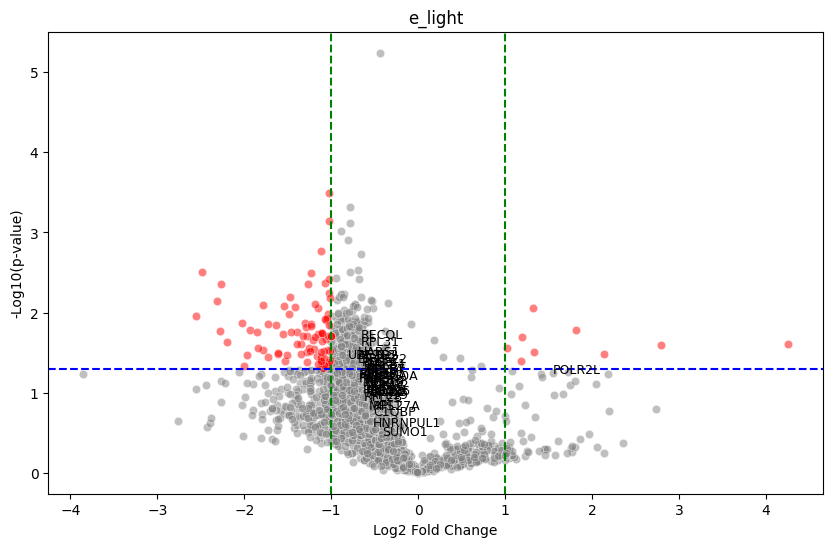

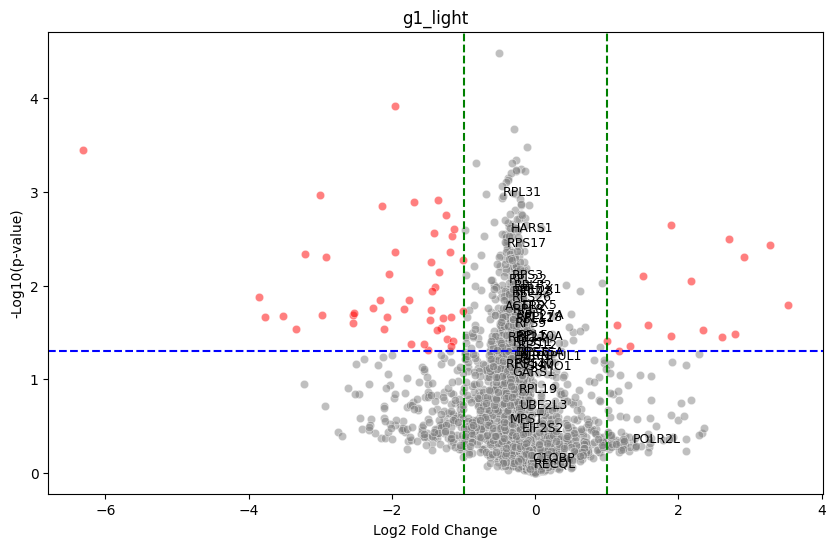

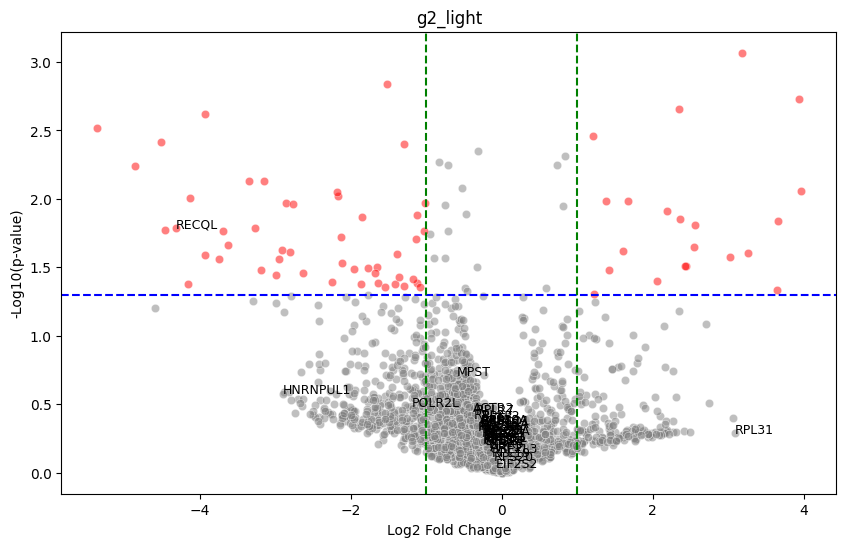

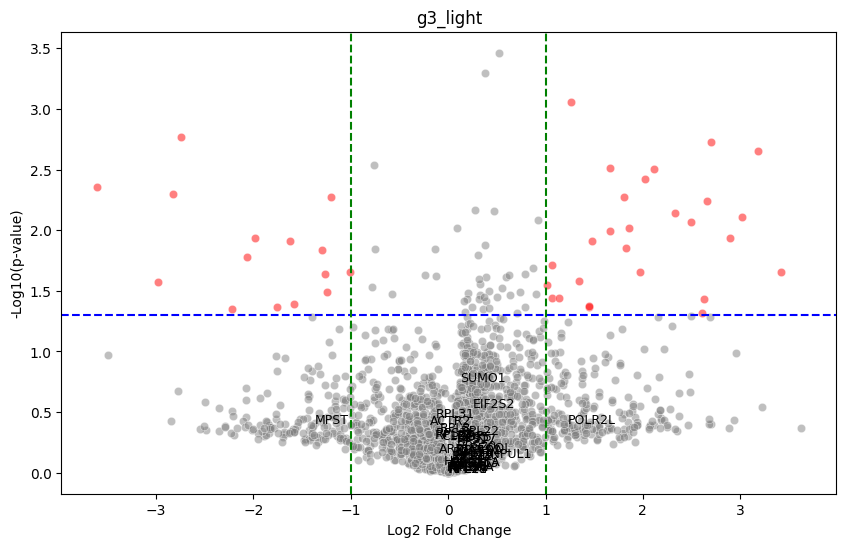

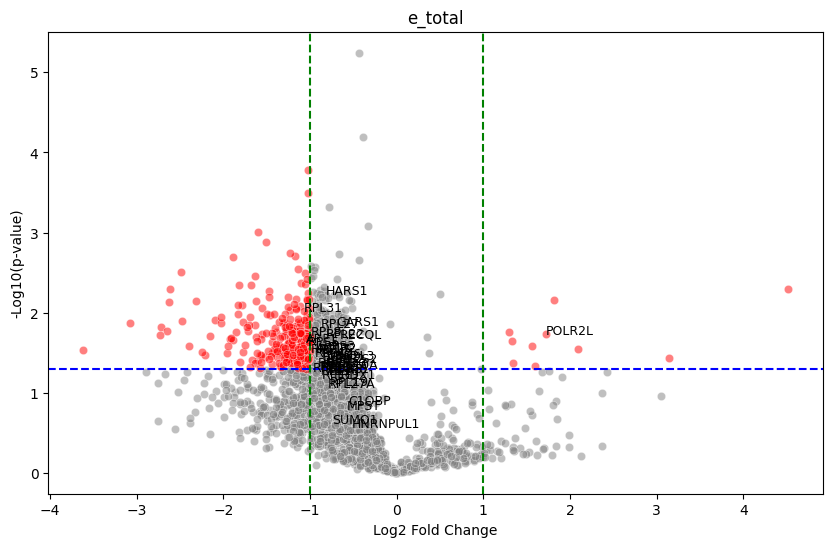

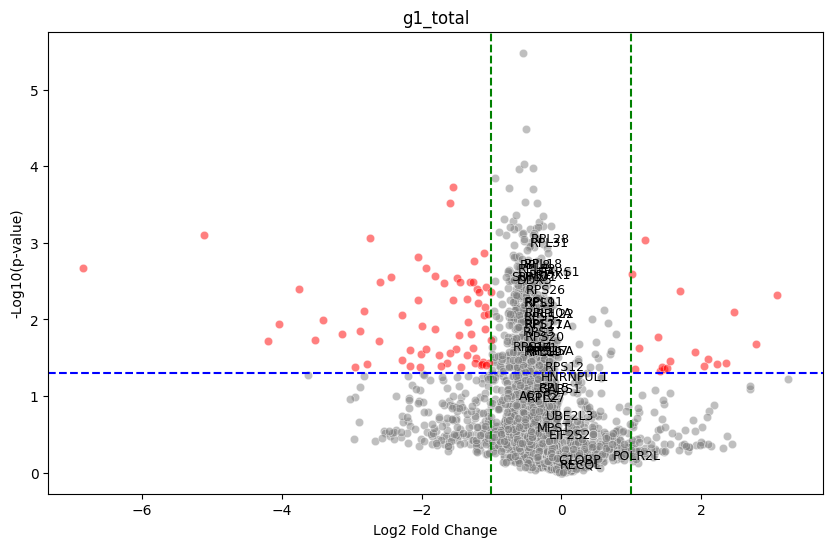

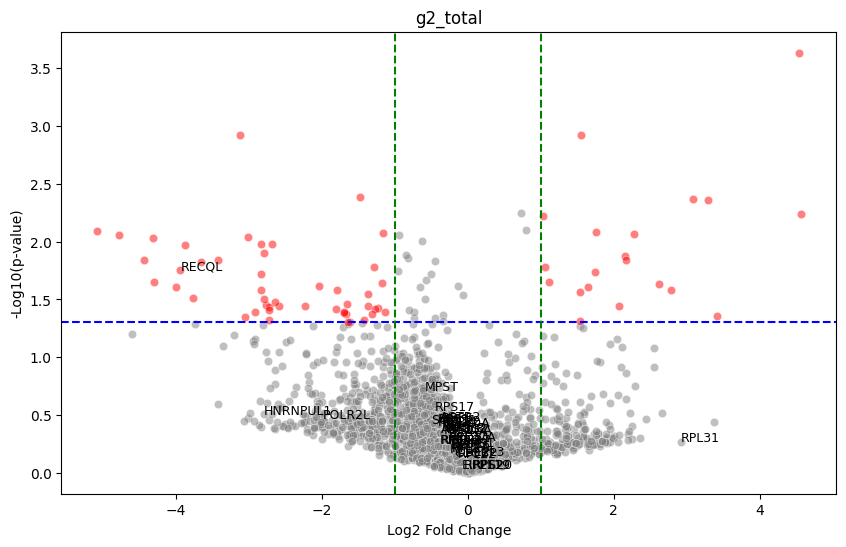

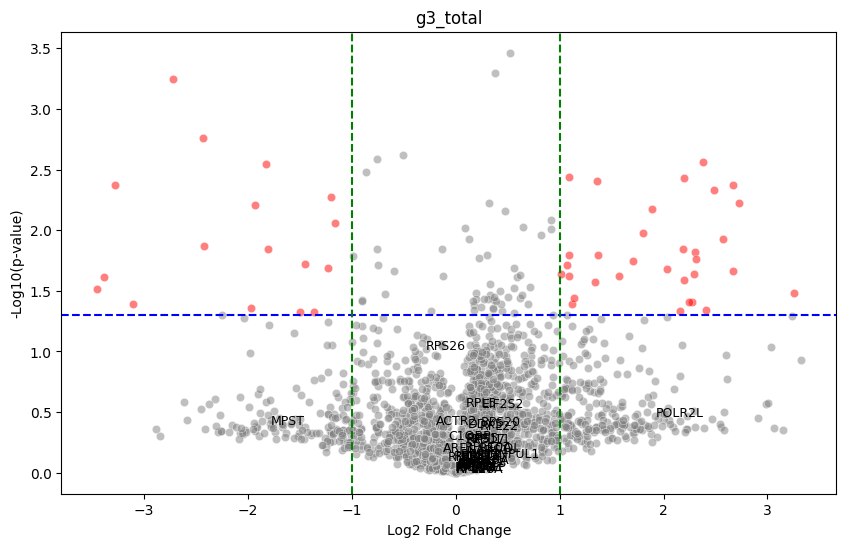

ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 2


In [7]:
# generate plots 
result_interpret.loop_and_plot_results(path, results_paths, pois, uniprot=True) #uniprot=True